In [113]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk(r"Images"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Images\random_images\IMG20241229110942.jpg
Images\random_images\IMG20241229110950.jpg
Images\random_images\IMG20241229111043.jpg
Images\random_images\IMG20241229113001.jpg
Images\random_images\IMG20241229113007.jpg
Images\random_images\IMG20241229113202.jpg
Images\random_images\IMG20241229113207.jpg
Images\random_images\IMG20241229113227.jpg
Images\random_images\IMG20241229113239.jpg
Images\random_images\IMG20241229113335.jpg
Images\random_images\IMG20241229113354.jpg
Images\random_images\IMG20241229113524.jpg
Images\test\apple\Image_1.jpg
Images\test\apple\Image_10.jpg
Images\test\apple\Image_2.jpg
Images\test\apple\Image_3.jpg
Images\test\apple\Image_4.jpg
Images\test\apple\Image_5.jpg
Images\test\apple\Image_6.JPG
Images\test\apple\Image_7.jpg
Images\test\apple\Image_8.jpg
Images\test\apple\Image_9.jpg
Images\test\banana\Image_1.jpg
Images\test\banana\Image_10.jpg
Images\test\banana\Image_2.jpg
Images\test\banana\Image_3.jpg
Images\test\banana\Image_4.jpg
Images\test\banana\Image_5.

In [114]:
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img,img_to_array

print(tf.version)

<module 'tensorflow._api.v2.version' from 'c:\\Users\\amanp\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [115]:
train_dir = Path("Images/train")
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [116]:
test_dir = Path("Images/test")
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [117]:
val_dir = Path("Images/validation")
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

In [118]:
def image_processing(filepath):

    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    df = pd.concat([filepath, labels], axis=1)

    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [119]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [120]:
print('  Training Set  \n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

  Training Set  

Number of pictures: 2865

Number of different labels: 36

Labels: ['peas' 'grapes' 'bell pepper' 'turnip' 'cucumber' 'jalepeno' 'ginger'
 'soy beans' 'watermelon' 'corn' 'onion' 'spinach' 'mango' 'potato'
 'sweetcorn' 'paprika' 'apple' 'eggplant' 'garlic' 'cauliflower' 'kiwi'
 'beetroot' 'pomegranate' 'banana' 'cabbage' 'capsicum' 'chilli pepper'
 'raddish' 'orange' 'sweetpotato' 'lettuce' 'tomato' 'pear' 'carrot'
 'lemon' 'pineapple']


In [121]:
train_df.head()

,Filepath,Label
0,Images\train\peas\Image_92.jpg,peas
1,Images\train\grapes\Image_56.jpg,grapes
2,Images\train\bell pepper\Image_8.jpg,bell pepper
3,Images\train\turnip\Image_29.jpg,turnip
4,Images\train\cucumber\Image_35.jpg,cucumber


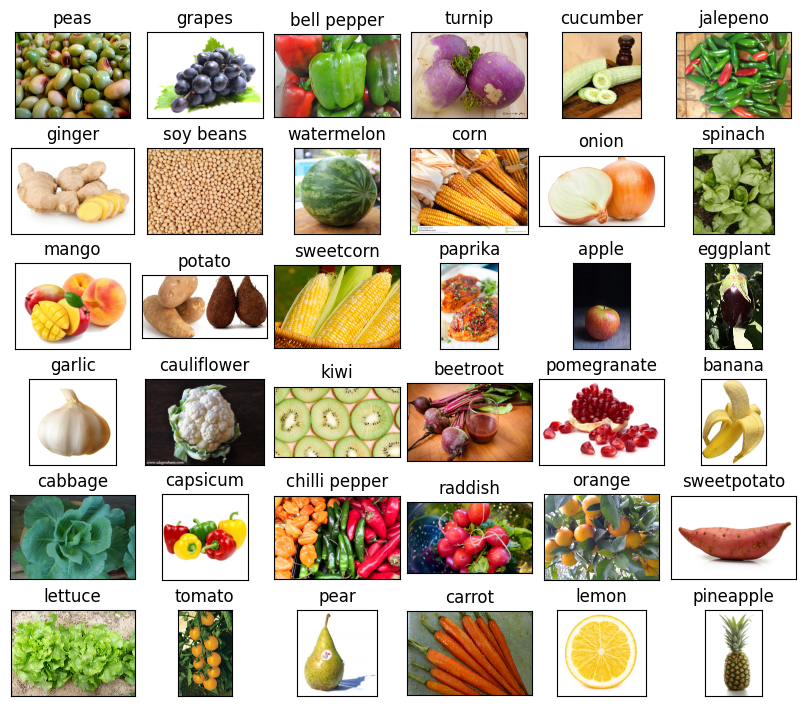

In [122]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [123]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [124]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2865 validated image filenames belonging to 36 classes.


In [125]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [126]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [127]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [128]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

c:\Users\amanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.3530 - loss: 2.5580 - val_accuracy: 0.8412 - val_loss: 0.4608
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 89s 985ms/step - accuracy: 0.8032 - loss: 0.6105 - val_accuracy: 0.9029 - val_loss: 0.3347
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 89s 982ms/step - accuracy: 0.8960 - loss: 0.3358 - val_accuracy: 0.9353 - val_loss: 0.2546
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 89s 987ms/step - accuracy: 0.9331 - loss: 0.2079 - val_accuracy: 0.9324 - val_loss: 0.2065
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 88s 975ms/step - accuracy: 0.9539 - loss: 0.1504 - val_accuracy: 0.9471 - val_loss: 0.1979


In [129]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 983ms/step


['spinach',
 'sweetcorn',
 'carrot',
 'tomato',
 'sweetcorn',
 'chilli pepper',
 'jalepeno',
 'lettuce',
 'bell pepper',
 'watermelon',
 'sweetcorn',
 'cabbage',
 'corn',
 'pineapple',
 'capsicum',
 'eggplant',
 'sweetcorn',
 'cucumber',
 'capsicum',
 'pineapple',
 'grapes',
 'cabbage',
 'cucumber',
 'watermelon',
 'turnip',
 'ginger',
 'mango',
 'jalepeno',
 'cabbage',
 'kiwi',
 'turnip',
 'paprika',
 'banana',
 'apple',
 'kiwi',
 'ginger',
 'bell pepper',
 'garlic',
 'potato',
 'cabbage',
 'onion',
 'raddish',
 'spinach',
 'soy beans',
 'sweetpotato',
 'lemon',
 'beetroot',
 'pineapple',
 'raddish',
 'sweetcorn',
 'jalepeno',
 'pineapple',
 'bell pepper',
 'paprika',
 'spinach',
 'jalepeno',
 'orange',
 'paprika',
 'pineapple',
 'cabbage',
 'onion',
 'eggplant',
 'chilli pepper',
 'grapes',
 'sweetcorn',
 'turnip',
 'raddish',
 'apple',
 'sweetpotato',
 'cauliflower',
 'cauliflower',
 'beetroot',
 'garlic',
 'jalepeno',
 'orange',
 'ginger',
 'lemon',
 'banana',
 'peas',
 'carrot',
 

In [130]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [131]:
img1 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229110942.jpg')
img2 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229110950.jpg')
img3 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229111043.jpg')
img4 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113001.jpg')
img5 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113202.jpg')
img6 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113207.jpg')
img7 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113227.jpg')
img8 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113239.jpg')
img9 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113335.jpg')
img10 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113354.jpg')
img11 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113524.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [132]:
print(img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11)

potato potato tomato jalepeno potato tomato lettuce chilli pepper raddish raddish onion


In [133]:
model.save("fnv_recognition_model.h5")